# Day 1 - Preprocessing for Arabic OCR ##
### Objetive: Exercise on De-noising, Erosion, Dilation, and Rotation Correction ###
### Dataset: Handwritten Arabic Image  ###
### Please fill in all sections that start with "# Task" , sections that start with "# Step" are  pre-implemented ####### 

#### Section 1 - Dependencies & Libraries

In [ ]:
# Step 1.1. - Install required libraries
!pip3 install numpy torch torchvision easyocr matplotlib deskew opencv-python opencv-contrib-python

# Step 1.2. - Restart Kernel Manually
# Toolbar -> Kernel -> Restart & Clear Output -> Restart & Clear All Outputs

In [1]:
# Step 1.3. - Import required libraries
import cv2, numpy as np, easyocr, pandas as pd, os, matplotlib.pyplot as plt
from deskew import determine_skew
from skimage.transform import rotate

#### Section 2 - Set up EasyOCR Arabic Recognition Model

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


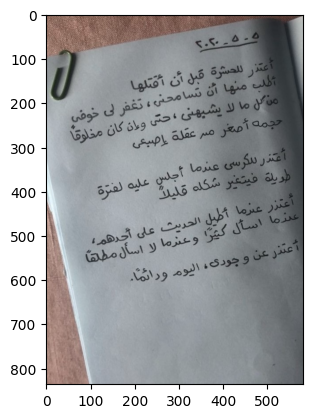

In [2]:
# Task 2.1. Instantiate easyocr.Reader for Arabic Language
# Tutorial Available @ https://www.jaided.ai/easyocr/tutorial/
reader = easyocr.Reader(['ar'])

# Task 2.2. Read handwritten_arabic.jpg using OpenCV
img = cv2.imread('handwritten_arabic.jpg')

# Step 2.3. Define function to show opencv image inline using matplotlib
def show_image(image, color=None):
    imgplot = plt.imshow(image, cmap=color)
    plt.show()

# Task 2.4. Test function from task 2.3.
show_image(img)

#### Section 3 - Use EasyOCR to recognize arabic text and explore the output

In [3]:
# Task 3.1. Recognize text and explore the output format
for line in reader.readtext(img)[:2]:
    print(line)

[[[446, 38], [484, 38], [484, 68], [446, 68]], '-٥', 0.5425891100344544]
[[[273, 105], [456, 105], [456, 173], [273, 173]], 'للصشرة قبل أن', 0.48988377467681643]


#### Section 4 - Write a function that uses EasyOCR and prints the string in the correct order for arabic

In [4]:
# Step 4: Write a function that
#           - Accepts an image input
#           - Recognizes text within image using EasyOCR
#           - Re-Orders the text output based on the x,y coordinates for each bounding box
#           - Prints the String in the correct order 
# Step 4.1. Define the Function
def img_to_text(img):
    # Task 4.2. Recognize the text using EasyOCR
    results = reader.readtext(img)
    # Task 4.3. For each row in the extracted results extract
    #           the minimum and maximum values of x and y
    #           the recognized arabic sentence
    #           Storing Results in a Pandas DataFrame
    data = []
    for result in results:
        x_values = [bounding_box[0] for bounding_box in result[0]]
        y_values = [bounding_box[1] for bounding_box in result[0]]
        sentence = result[1]
        data.append({'min_x': min(x_values), 'max_x': max(x_values), 'min_y': min(y_values), 'max_y': max(y_values), 'sentence': sentence})
    df = pd.DataFrame(data)
    # Task 4.4. Calculate the Average Line Height as an integer; assuming each record in the dataframe is one line; height = (max_y-min_y)
    average_line_height = int((df['max_y'] - df['min_y']).mean())
    # Task 4.5. Calculate the Modulus of min_y to the line height; as a proxy for line order
    df['line'] = df['min_y']//average_line_height
    # Task 4.6. Sort the DataFrame by line ascending and max_x descending 
    df.sort_values(['line', 'max_x'], ascending=[True, False], inplace=True)
    # Task 4.7. Print each line of the dataframe
    # Hint: Use df.groupby('line')
    for line, group in df.groupby('line'):
        print(' '.join(group['sentence']))

# Task 4.8. Use img_to_text on the loaded handwritten_arabic image from Task 2.2
img_to_text(img)

-٥ _ ٥ ا
أ عتذر
أللب للصشرة قبل أن أقتلها
منلل منها أن تسا محنى تغفر
تجمه أمغر مالا شبهنى ` حتى وءان كان لى خوفى
مر عقلة اصبعى مخلوقا
أعذر للكر س عىدما أ جلس
لوبلة فيتغير شكله قليلااً عليه لفترة
أعذر علرما أطيل
عىذما اسآل كشرًا الحدبث عاى أحدهم '
 عتذل وعذما ا اسأل مطهًا
عن و جودى , اليوم ودائمًا.


#### Section 5 - Preprocess the handwritten_arabic image 

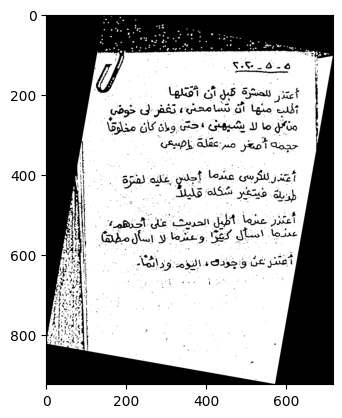

In [5]:
# Task 5.1. Apply Greyscaling using cv2.cvtColor
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Task 5.2. Apply Binary Thresholding using cv2.adaptiveThreshold (Experiment with adaptive methods and blocks sizes)
binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)

# Task 5.3. Apply Noise Removal 
# Task 5.3.1. Define a kernel for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Task 5.3.2. Apply Morphological Operation using defined kernel in 5.3.1
denoised_image = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

# Task 5.4. Perform Erosion or Dilation - as needed (required manual insepection - use function from task 2.3
# Task 5.4.1. Define Kernel for Erosion or Dilation - Size of the Kernel directly correctly to strength
kernel = np.ones((1,1), np.uint8)
# Task 5.4.2. Perform Erosion
eroded_image = cv2.erode(denoised_image, kernel, iterations=1)
# Task 5.4.3. Perform Dilation
dilated_image = cv2.dilate(denoised_image, kernel, iterations=1)

# Task 5.5. Fix Rotation - Deskewing Image
# Task 5.5.1. Determine Skew Angle 
angle = determine_skew(eroded_image)
# Task 5.5.2. Rotate Image to Deskew it
rotated_image = (rotate(dilated_image, angle, resize=True)*255).astype(np.uint8)

# Step 5.6. Show Final Image
show_image(rotated_image, color='gray')

#### Section 6 - Use img_to_text on the pre-processed handwritten_arabic image from section 5

In [6]:
# Step 6.1. Compare the Recognized Handwritten Text from the original Image Versus the Pre-processed image
img_to_text(img)
print("------------------")
img_to_text(rotated_image)

-٥ _ ٥ ا
أ عتذر
أللب للصشرة قبل أن أقتلها
منلل منها أن تسا محنى تغفر
تجمه أمغر مالا شبهنى ` حتى وءان كان لى خوفى
مر عقلة اصبعى مخلوقا
أعذر للكر س عىدما أ جلس
لوبلة فيتغير شكله قليلااً عليه لفترة
أعذر علرما أطيل
عىذما اسآل كشرًا الحدبث عاى أحدهم '
 عتذل وعذما ا اسأل مطهًا
عن و جودى , اليوم ودائمًا.
------------------
٥_٥ ٢٠٢٠
أعتذر للصشرة كبل أن أقتلها
أللب منها آت تسامحنى تغفر ى خوفى
مذثل مالا يشبهنى ٠ حتى وان كان مغلوقا
حجمه آ مغر مر :عقلة _صبعى
أعذر بلكرسى عىدما قجيل
طربلة فيتغير شكله  بعليه لفترة
أعتذر عسما أطيل الحدث على أجدهم 
عىذما سال كترا 9 لزما لا اسال مفها
+ فتنر غن وجودد . اليومة ودائمآ
